In [1]:
from pyspark import *
from pyspark.sql import *
from pyspark.sql.functions import *
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
df = spark.read.option("header", "true").csv("cat_csv_1/*.csv")
df.count()

2805212

In [3]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price(BTC): string (nullable = true)
 |-- from: string (nullable = true)
 |-- to: string (nullable = true)
 |-- vendor: string (nullable = true)
 |-- cat_hash: string (nullable = true)
 |-- cat: string (nullable = true)
 |-- date: string (nullable = true)



In [2]:
df.groupby("date").agg(count("date")).show(50)

+--------------------+-----------+
|                date|count(date)|
+--------------------+-----------+
|          2015-05-01|         60|
|          nL0oges5ZX|          2|
|          2015-02-09|      19862|
|          2015-02-28|      20899|
|          2015-02-26|      20842|
|          2014-11-01|      18676|
|          2014-10-23|       1326|
|          2015-01-21|      19345|
|          2015-01-18|      15544|
|          2015-03-29|      24324|
|          2014-09-26|       8721|
|          2015-02-24|      20119|
|          2014-12-28|      18143|
|          2014-07-30|        649|
|          2015-02-03|      20379|
|          2015-06-22|      22744|
|          2014-01-09|       1823|
|          2014-02-15|        474|
|          2014-05-24|      11894|
|          2014-11-27|       3321|
|          2015-01-10|      12832|
|          2015-06-04|      25650|
|          2015-01-26|      19595|
|          2015-02-19|      20360|
|          2014-10-06|      14155|
|          2015-04-0

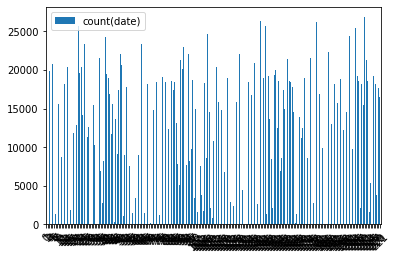

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
pdDF = df.groupby("date").agg(count("date")).toPandas()
ax = pdDF.plot.bar(rot=45)

date           201
count(date)    201
dtype: int64


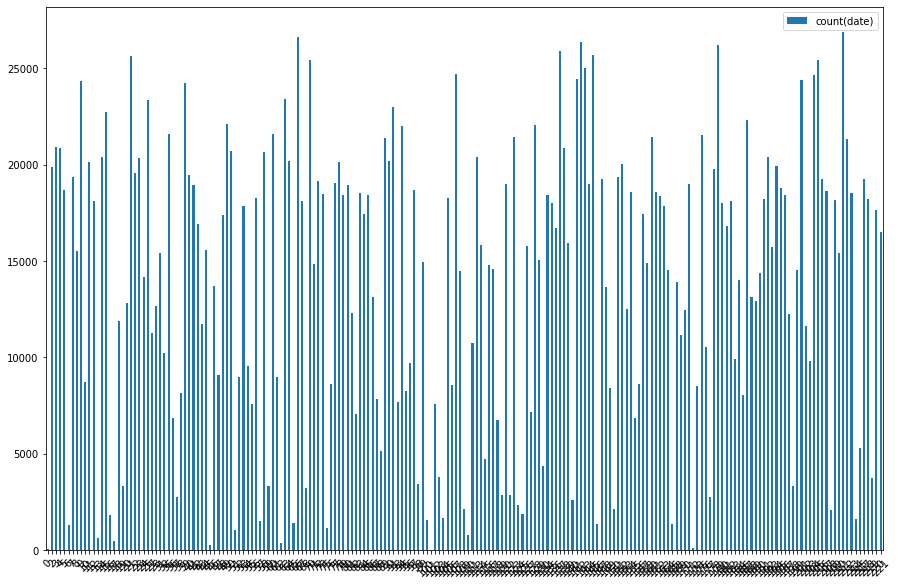

In [30]:

pdDF = pdDF[pdDF['date'].str.contains("\d\d\d\d-\d\d-\d\d")]
pdDF['date'] = pd.to_datetime(pdDF['date'],infer_datetime_format=True) 
pdDF = pdDF.sort_values(by='date', ascending=True, na_position='first')
print(pdDF.count())
pdDF.plot.bar(rot=45, figsize=(15,10))

In [32]:
pdDF['date'] = pd.to_datetime(pdDF['date'],infer_datetime_format=True) 
pdDF = pdDF.sort_values(by='date', ascending=True, na_position='first')

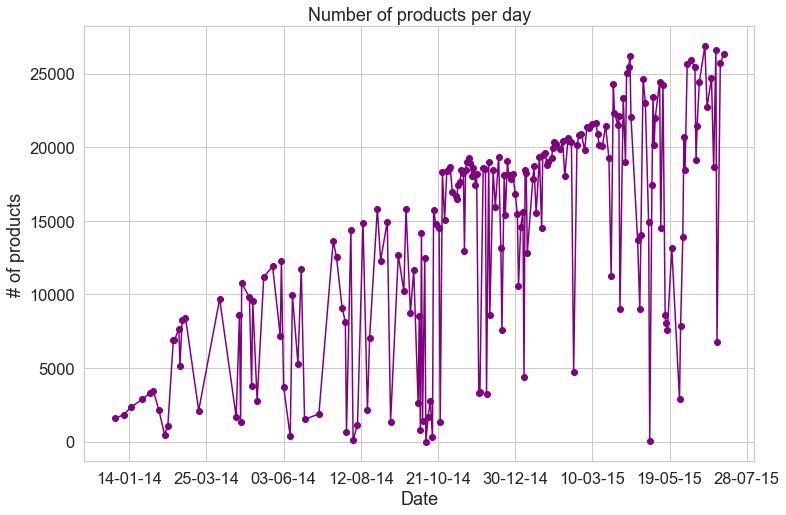

In [51]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(pdDF['date'],
        pdDF['count(date)'],
        '-o',
        color='purple')
ax.set(xlabel="Date", ylabel="# of products",
       title="Number of products per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()

In [109]:
test = df.groupby("date", "cat_hash").agg(count("cat_hash")).groupby("date").agg(count("cat_hash")).toPandas()
test = test[test['date'].str.contains("\d\d\d\d-\d\d-\d\d")]
test['date'] = pd.to_datetime(test['date'],infer_datetime_format=True) 
test = test.sort_values(by='date', ascending=True, na_position='first')
test.head()

,date,count(cat_hash)
100,2014-01-01,43
17,2014-01-09,44
123,2014-01-16,43
119,2014-01-26,51
198,2014-02-02,53


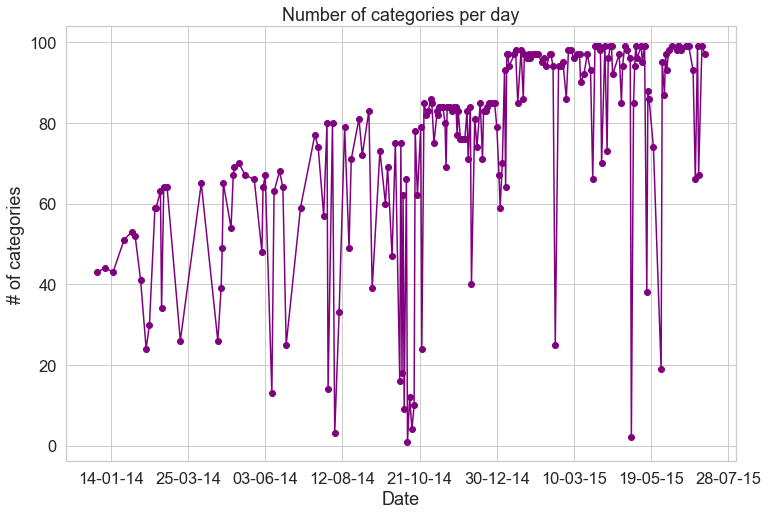

In [61]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test['date'],
        test['count(cat_hash)'],
        '-o',
        color='purple')
ax.set(xlabel="Date", ylabel="# of categories",
       title="Number of categories per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()

In [121]:




test = test.rename(columns={'count(cat_hash)': 'catNumber'})

g = test.groupby([test.date.dt.month, test.date.dt.year]).max()

#test

array(['2014-01-26T00:00:00.000000000', '2015-01-29T00:00:00.000000000',
       '2014-02-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2014-03-18T00:00:00.000000000', '2015-03-30T00:00:00.000000000',
       '2014-04-26T00:00:00.000000000', '2015-04-30T00:00:00.000000000',
       '2014-05-31T00:00:00.000000000', '2015-05-31T00:00:00.000000000',
       '2014-06-22T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2015-07-07T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-09-29T00:00:00.000000000',
       '2014-10-31T00:00:00.000000000', '2014-11-28T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

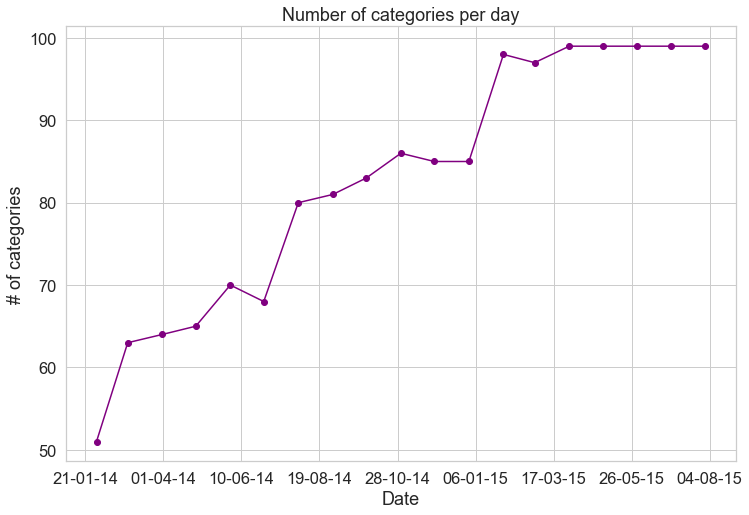

In [81]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(g.index,
        g,
        '-o',
        color='purple')
ax.set(xlabel="Date", ylabel="# of categories",
       title="Number of categories per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()

In [125]:
pdDF2 = pdDF.set_index('date')
#pdDF2
pdDF2 = pdDF2.loc[g['date'].values]
pdDF2.sort_index(inplace=True)
pdDF2

,count(date)
date,
2014-01-26,2867
2014-02-28,7676
2014-03-18,2107
2014-04-26,10741
2014-05-31,7176
2014-06-22,1499
2014-07-30,649
2014-08-30,12300
2014-09-29,11647


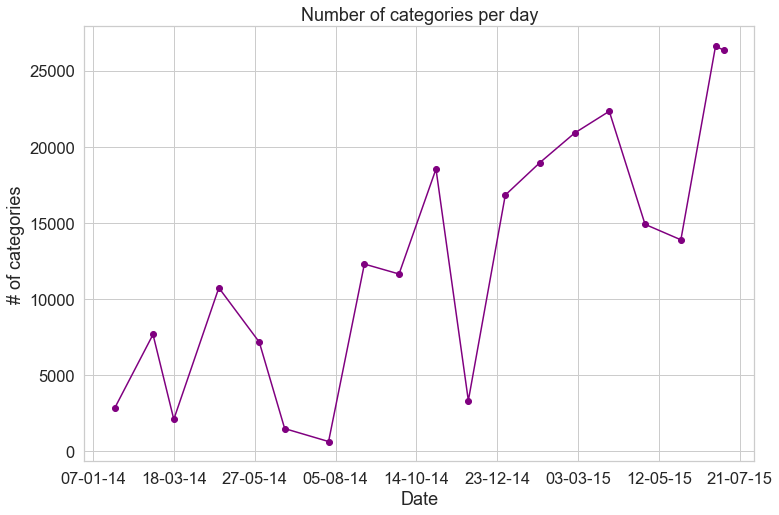

In [128]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(pdDF2.index,
        pdDF2,
        '-o',
        color='purple')
ax.set(xlabel="Date", ylabel="# of categories",
       title="Number of categories per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()